# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key

from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [45]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names

cities = []

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL, from the documentation

main_url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{main_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_dictionary = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = city_weather_dictionary["coord"]["lat"]
        city_longitude = city_weather_dictionary["coord"]["lon"]
        city_max_temp = city_weather_dictionary["main"]["temp_max"]
        city_humidity = city_weather_dictionary["main"]["humidity"]
        city_clouds = city_weather_dictionary["clouds"]["all"]
        city_wind = city_weather_dictionary["wind"]["speed"]
        city_country = city_weather_dictionary["sys"]["country"]
        city_date = city_weather_dictionary["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitude, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | monticello
Processing Record 2 of Set 1 | colima
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | ejido benito juarez
City not found. Skipping...
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | inhambane
Processing Record 9 of Set 1 | namtsy
Processing Record 10 of Set 1 | ranong
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | kiratu
Processing Record 13 of Set 1 | mengyin
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | manokwari
Processing Record 22 of 

In [7]:
# Convert the cities weather data into a Pandas DataFrame

CityDataDF = pd.DataFrame(city_data)

# Show Record Count

CityDataDF.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [8]:
# Display sample data

CityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,monticello,45.3055,-93.7941,24.97,40,100,3.60,US,1694741675
1,colima,19.1667,-104.0000,25.78,95,54,1.00,MX,1694741676
2,grytviken,-54.2811,-36.5092,-4.51,97,75,1.47,GS,1694741676
3,saint-francois,46.4154,3.9054,12.69,100,0,0.00,FR,1694741676
4,lihue,21.9789,-159.3672,28.58,82,75,6.69,US,1694741555


In [9]:
# Export the CityDataDF into a CSV

CityDataDF.to_csv("output_data/cities.csv", index_label = "City_ID")

In [46]:
# Read saved data

MainCityDataDF = pd.read_csv("output_data/cities.csv", index_col = "City_ID")

# Display sample data

MainCityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monticello,45.3055,-93.7941,24.97,40,100,3.60,US,1694741675
1,colima,19.1667,-104.0000,25.78,95,54,1.00,MX,1694741676
2,grytviken,-54.2811,-36.5092,-4.51,97,75,1.47,GS,1694741676
3,saint-francois,46.4154,3.9054,12.69,100,0,0.00,FR,1694741676
4,lihue,21.9789,-159.3672,28.58,82,75,6.69,US,1694741555


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [69]:
# Colors for plots
orange = "#f68717"
blue = "#1786f6"

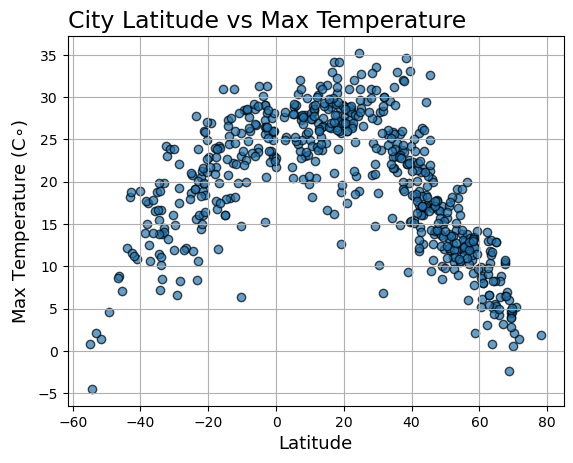

In [47]:
# Build scatter plot for latitude vs. max temperature

plt.scatter(data = MainCityDataDF,
            x = "Lat",
            y = "Max Temp",
            alpha = .70,
            edgecolors = "black"
            )
plt.title(label = "City Latitude vs Max Temperature",
          fontsize = 17,
          loc = "left")
plt.xlabel(xlabel = "Latitude",
           fontsize = 13),
plt.ylabel(ylabel = "Max Temperature (C$\circ$)",
           fontsize = 13)

plt.grid()

# Save the figure

plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

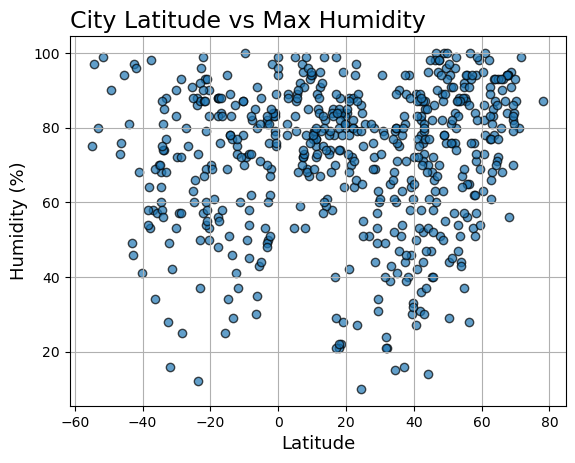

In [48]:
# Scatter plot for latitude vs. humidity

plt.scatter(data = MainCityDataDF,
            x = "Lat",
            y = "Humidity",
            alpha = .70,
            edgecolors = "black"
            )
plt.title(label = "City Latitude vs Max Humidity",
          fontsize = 17,
          loc = "left")
plt.xlabel(xlabel = "Latitude",
           fontsize = 13),
plt.ylabel(ylabel = "Humidity (%)",
           fontsize = 13)

plt.grid()

# Save the figure

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

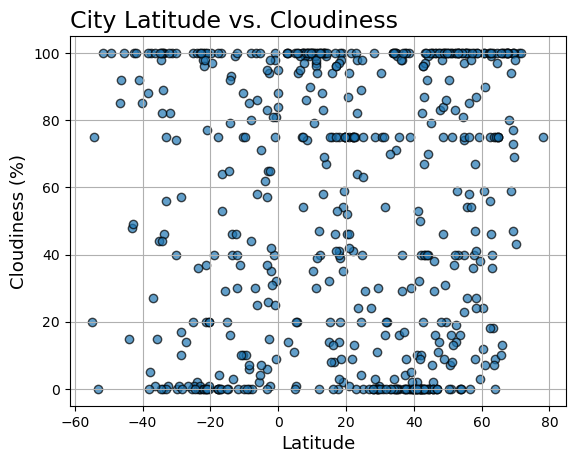

In [49]:
# Scatter plot for latitude vs. cloudiness

plt.scatter(data = MainCityDataDF,
            x = "Lat",
            y = "Cloudiness",
            alpha = .70,
            edgecolors = "black"
            )
plt.title(label = "City Latitude vs. Cloudiness",
          fontsize = 17,
          loc = "left")
plt.xlabel(xlabel = "Latitude",
           fontsize = 13),
plt.ylabel(ylabel = "Cloudiness (%)",
           fontsize = 13)

plt.grid()

# Save the figure

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

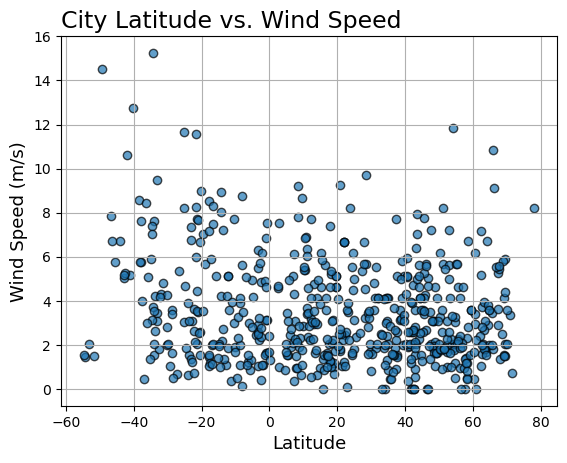

In [52]:
# Scatter plot for latitude vs. wind speed

plt.scatter(data = MainCityDataDF,
            x = "Lat",
            y = "Wind Speed",
            alpha = .70,
            edgecolors = "black"
            )
plt.title(label = "City Latitude vs. Wind Speed",
          fontsize = 17,
          loc = "left")
plt.xlabel(xlabel = "Latitude",
           fontsize = 13),
plt.ylabel(ylabel = "Wind Speed (m/s)",
           fontsize = 13)

plt.grid()

# Save the figure

plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
MainCityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monticello,45.3055,-93.7941,24.97,40,100,3.60,US,1694741675
1,colima,19.1667,-104.0000,25.78,95,54,1.00,MX,1694741676
2,grytviken,-54.2811,-36.5092,-4.51,97,75,1.47,GS,1694741676
3,saint-francois,46.4154,3.9054,12.69,100,0,0.00,FR,1694741676
4,lihue,21.9789,-159.3672,28.58,82,75,6.69,US,1694741555


In [55]:
type(MainCityDataDF["Lat"])

pandas.core.series.Series

In [59]:
lr_results = linregress(MainCityDataDF["Lat"],MainCityDataDF["Max Temp"])
lr_results

LinregressResult(slope=-0.07326719484477714, intercept=21.09218485291719, rvalue=-0.29529674310036463, pvalue=3.2423121174900534e-13, stderr=0.009826009753766345, intercept_stderr=0.36748860306212305)

In [58]:
lr_results[0]

-0.07326719484477714

In [139]:
# Define a function to create Linear Regression plots

def PlotLinearRegression(x_values, y_values, title, x_label, y_label, text_coordinates):

    linear_regression_results = linregress(x_values, y_values)
    slope = linear_regression_results[0]
    y_intercept = linear_regression_results[1]
    r_value = linear_regression_results[2]
    p_value = linear_regression_results[3]
    std_err = linear_regression_results[4]

    y_values_regression = slope*x_values + y_intercept
    regression_line = f"y = {round(slope, 2)}x + {round(y_intercept, 2)}"

    plt.scatter(x = x_values,
                y = y_values,
                color = blue,
                alpha = .60)
    plt.plot(x_values,
             y_values_regression,
             linewidth = 2,
             color = orange)
    plt.annotate(regression_line,
                 text_coordinates,
                 color = orange,
                 fontsize = 14)
    plt.title(label = title,
              loc = "left",
              fontsize = 17)
    plt.xlabel(xlabel = x_label,
               fontsize = 14)
    plt.ylabel(ylabel = y_label,
               fontsize = 14)

    print(f"The r-value is {round(r_value**2, 4)}")

    plt.show()

The r-value is 0.09


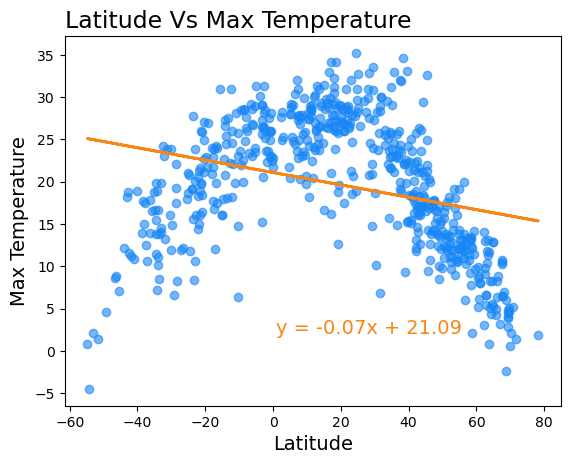

In [110]:
PlotLinearRegression(x_values = MainCityDataDF["Lat"],
                     y_values = MainCityDataDF["Max Temp"],
                     title = "Latitude Vs Max Temperature",
                     x_label = "Latitude",
                     y_label = "Max Temperature",
                     text_coordinates = (1,2))

In [116]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

NorthernHemisphereDF = MainCityDataDF[MainCityDataDF["Lat"] >= 0]

# Display sample data

NorthernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monticello,45.3055,-93.7941,24.97,40,100,3.60,US,1694741675
1,colima,19.1667,-104.0000,25.78,95,54,1.00,MX,1694741676
3,saint-francois,46.4154,3.9054,12.69,100,0,0.00,FR,1694741676
4,lihue,21.9789,-159.3672,28.58,82,75,6.69,US,1694741555
5,stanley,54.8680,-1.6985,12.10,92,40,0.51,GB,1694741677


In [117]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

SouthernHemisphereDF = MainCityDataDF[MainCityDataDF["Lat"] < 0]

# Display sample data

SouthernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-4.51,97,75,1.47,GS,1694741676
6,inhambane,-23.8650,35.3833,19.19,88,2,3.91,MZ,1694741678
9,edinburgh of the seven seas,-37.0676,-12.3116,10.64,58,27,0.47,SH,1694741680
10,kiratu,-3.3333,35.6667,15.29,81,57,2.88,TZ,1694741680
15,puerto ayora,-0.7393,-90.3518,23.08,89,81,3.13,EC,1694741682


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6715


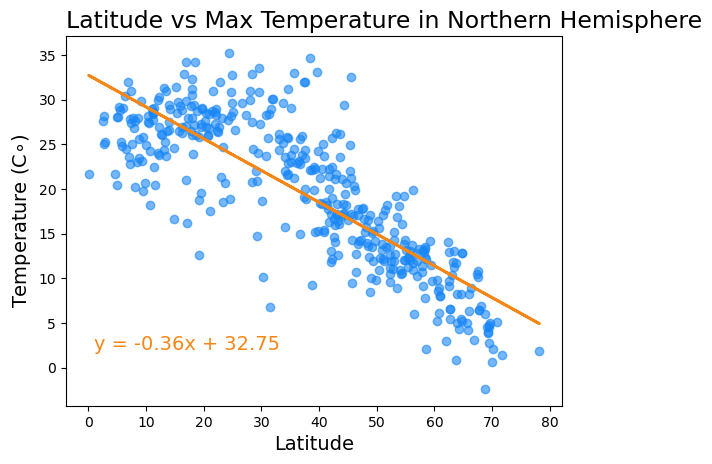

In [155]:
# Linear regression on Northern Hemisphere

PlotLinearRegression(x_values = NorthernHemisphereDF["Lat"],
                     y_values = NorthernHemisphereDF["Max Temp"],
                     title = "Latitude vs Max Temperature in Northern Hemisphere",
                     x_label = "Latitude",
                     y_label = "Temperature (C$\circ$)",
                     text_coordinates = (1,2))

The r-value is 0.5714


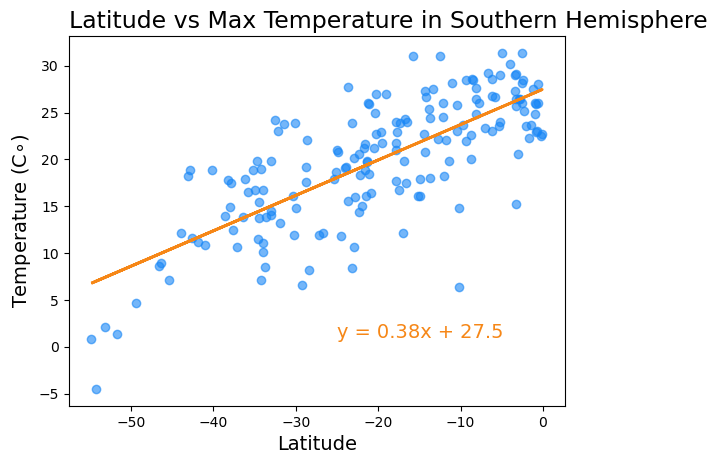

In [156]:
# Linear regression on Southern Hemisphere

PlotLinearRegression(x_values = SouthernHemisphereDF["Lat"],
                     y_values = SouthernHemisphereDF["Max Temp"],
                     title = "Latitude vs Max Temperature in Southern Hemisphere",
                     x_label = "Latitude",
                     y_label = "Temperature (C$\circ$)",
                     text_coordinates = (-25,1))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0036


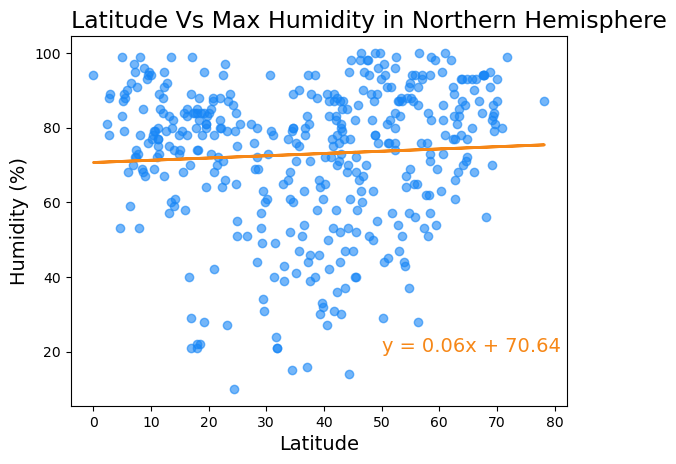

In [157]:
# Northern Hemisphere

PlotLinearRegression(x_values = NorthernHemisphereDF["Lat"],
                     y_values = NorthernHemisphereDF["Humidity"],
                     title = "Latitude Vs Max Humidity in Northern Hemisphere",
                     x_label = "Latitude",
                     y_label = "Humidity (%)",
                     text_coordinates = (50,20))

The r-value is 0.0001


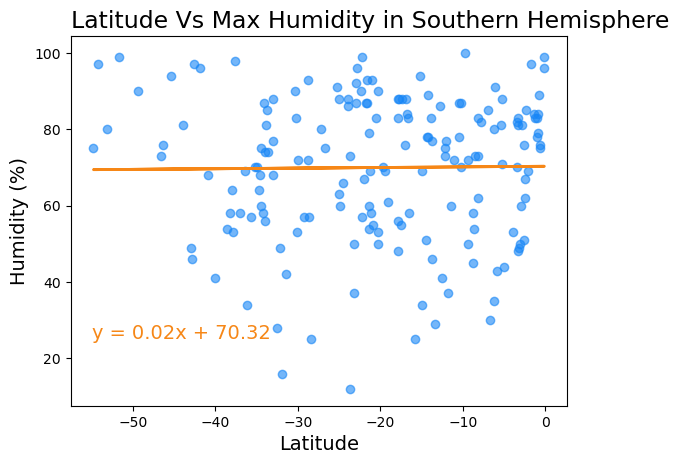

In [165]:
# Southern Hemisphere

PlotLinearRegression(x_values = SouthernHemisphereDF["Lat"],
                     y_values = SouthernHemisphereDF["Humidity"],
                     title = "Latitude Vs Max Humidity in Southern Hemisphere",
                     x_label = "Latitude",
                     y_label = "Humidity (%)",
                     text_coordinates = (-55,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0011


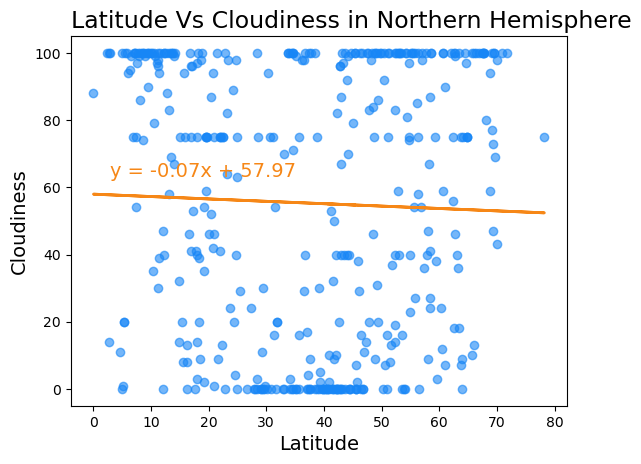

In [172]:
# Northern Hemisphere

PlotLinearRegression(x_values = NorthernHemisphereDF["Lat"],
                     y_values = NorthernHemisphereDF["Cloudiness"],
                     title = "Latitude Vs Cloudiness in Northern Hemisphere",
                     x_label = "Latitude",
                     y_label = "Cloudiness",
                     text_coordinates = (3,63))

The r-value is 0.0105


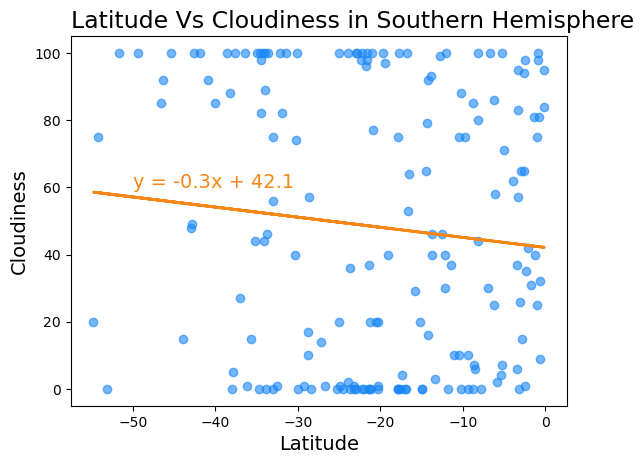

In [174]:
# Southern Hemisphere

PlotLinearRegression(x_values = SouthernHemisphereDF["Lat"],
                     y_values = SouthernHemisphereDF["Cloudiness"],
                     title = "Latitude Vs Cloudiness in Southern Hemisphere",
                     x_label = "Latitude",
                     y_label = "Cloudiness",
                     text_coordinates = (-50,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0009


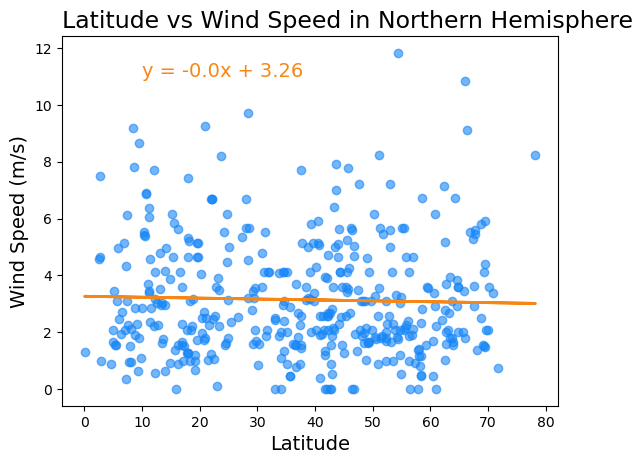

In [176]:
# Northern Hemisphere

PlotLinearRegression(x_values = NorthernHemisphereDF["Lat"],
                     y_values = NorthernHemisphereDF["Wind Speed"],
                     title = "Latitude vs Wind Speed in Northern Hemisphere",
                     x_label = "Latitude",
                     y_label = "Wind Speed (m/s)",
                     text_coordinates = (10,11))

The r-value is 0.0666


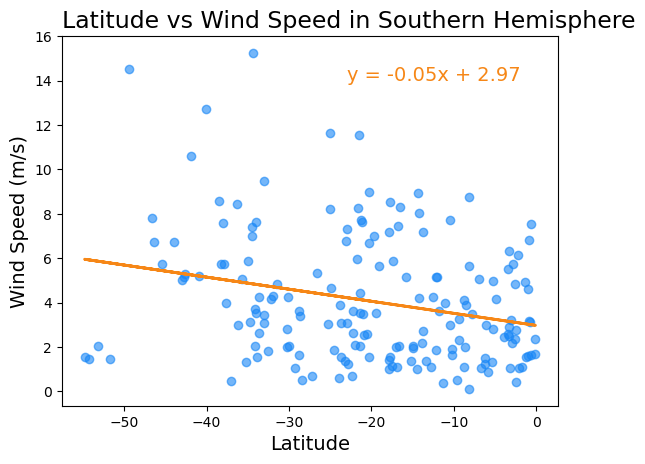

In [181]:
# Southern Hemisphere

PlotLinearRegression(x_values = SouthernHemisphereDF["Lat"],
                     y_values = SouthernHemisphereDF["Wind Speed"],
                     title = "Latitude vs Wind Speed in Southern Hemisphere",
                     x_label = "Latitude",
                     y_label = "Wind Speed (m/s)",
                     text_coordinates = (-23,14))

**Discussion about the linear relationship:** YOUR RESPONSE HERE